# Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob
import librosa

#Configurando el estilo de los gráficos
from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

# Leemos audio

In [ ]:
audio_files = glob('dataset/*.wav')
y, sr = librosa.load(audio_files[0], sr=None)

# Ajustamos audio

In [12]:
y = y[:sr] #Usamos 1 segundo de audio
y = y - np.mean(y) # Restamos la media para centrar el audio
y = librosa.util.normalize(y) # Normalizamos el audio

# Mostramos el audio leido

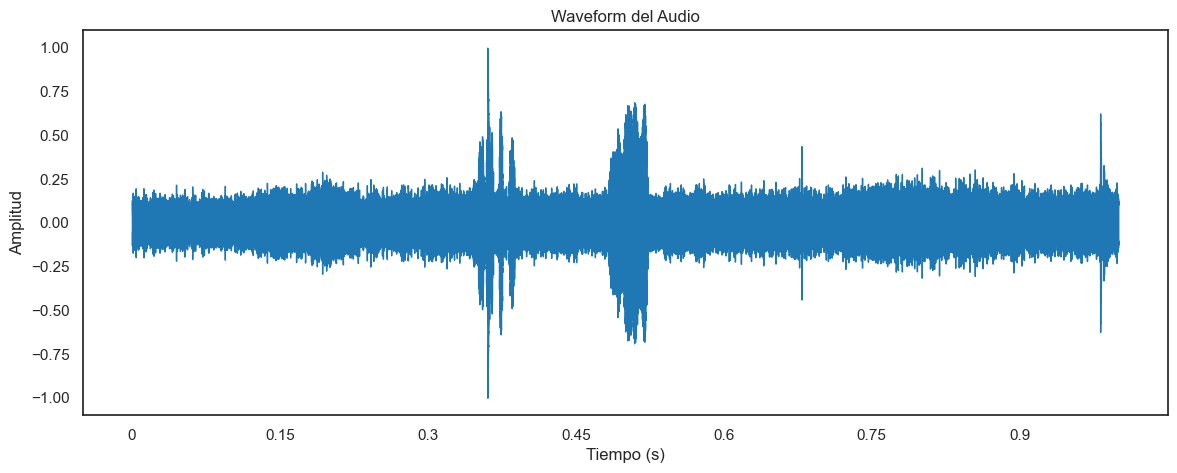

In [13]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform del Audio')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

# Calculamos la transformada rápida de Fourier

In [ ]:
#Calculamos la Transformada rapida de Fourier (FFT)
N = len(y)
fhat = np.fft.fft(y)  # Calculamos la FFT
freq = np.fft.fftfreq(N, d=1/sr) # Calculamos las frecuencias asociadas a la FFT
energia = np.abs(fhat)**2  # Calculamos la energia del espectro

# Mostramos la señal en el dominio de las frecuencias

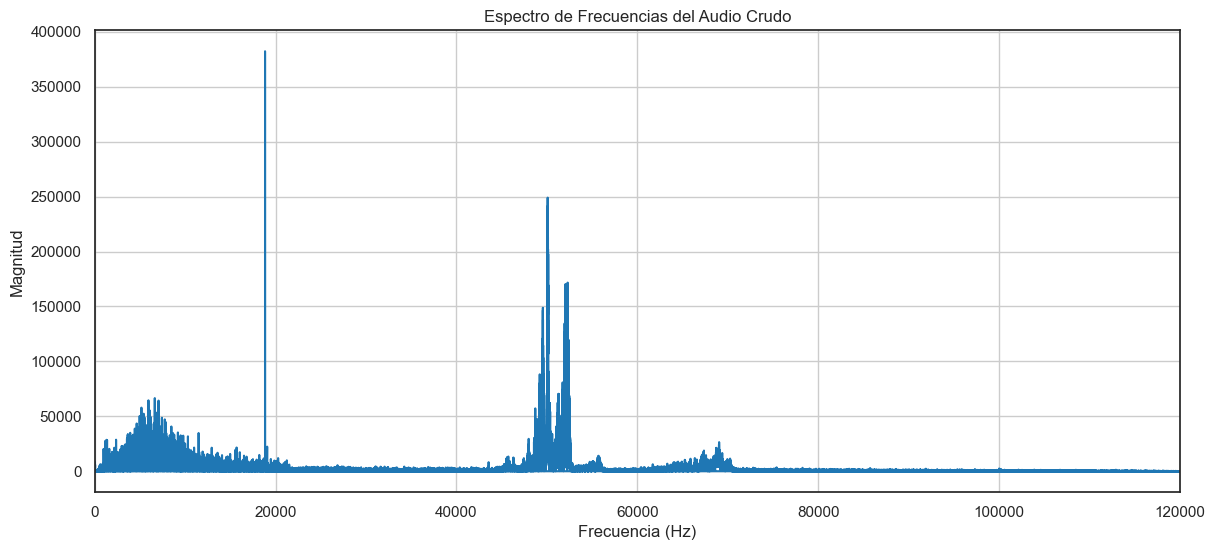

In [24]:
plt.figure(figsize=(14, 6))
plt.plot(freq[:N//2 + 1], energia[:N//2 + 1])  # Graficamos solo la mitad positiva del espectro
plt.xlim(0, 120000)  # Hasta 120 kHz
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de Frecuencias del Audio Crudo')
plt.grid(True)
plt.show()


# Filtro pasabanda

Usamos un filtro que nos ayuda a eliminar el audio fuera del rango de frecuencias ultrasonicas

In [20]:
from scipy.signal import butter, filtfilt

# 1. Parámetros
lowcut = 20000  # Hz, corte inferior
highcut = 90000  # Hz, corte superior
order = 5  # orden del filtro (puedes ajustar esto más adelante)

# 2. Normalizamos las frecuencias a la escala de [0,1] donde 1 es Nyquist (sr/2)
nyquist = sr / 2
low = lowcut / nyquist
high = highcut / nyquist

# 3. Creamos el filtro pasa banda
b, a = butter(order, [low, high], btype='bandpass')

# 4. Aplicamos el filtro usando filtfilt (sin desfase)
y_filtrado = filtfilt(b, a, y)

# Corroboramos que el filtro pasabanda haya funcionado

In [32]:
# Calculamos la Transformada rápida de Fourier (FFT) sobre la señal filtrada
N_filtrado = len(y_filtrado)
fhat_filtrado = np.fft.fft(y_filtrado)
energia_filtrada = np.abs(fhat_filtrado)**2 
freq_filtrado = np.fft.fftfreq(N_filtrado, d=1/sr)

# Mostramos como se ve la señal filtrada

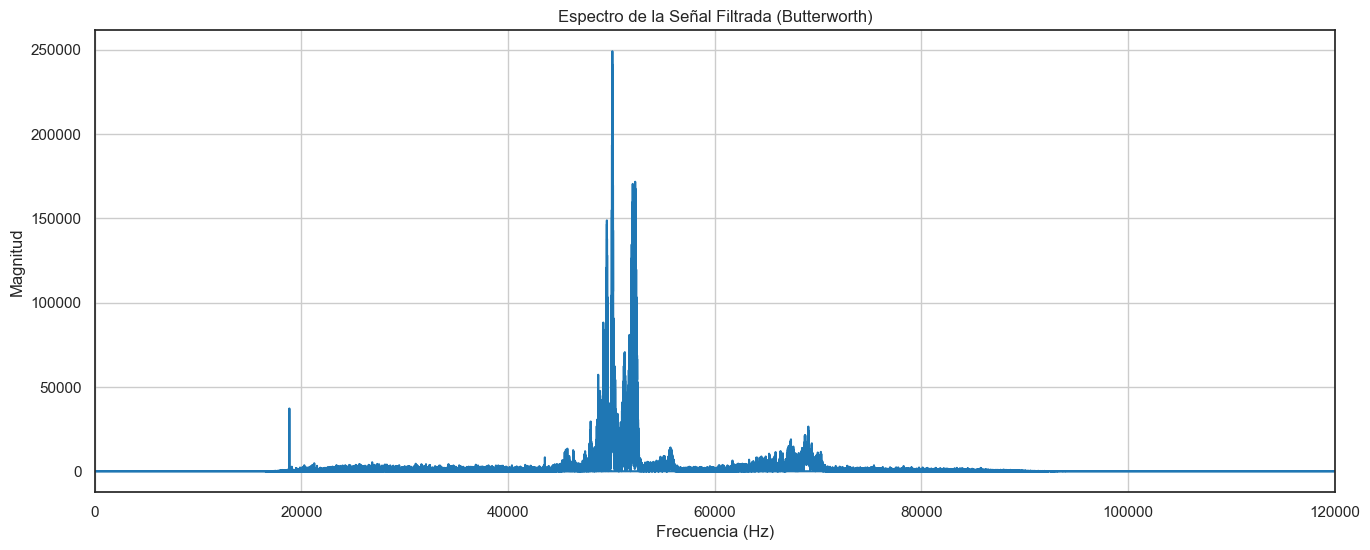

In [33]:
plt.figure(figsize=(16, 6))
plt.plot(freq_filtrado[:N//2 + 1], energia_filtrada[:N//2 + 1]) # Graficamos solo la mitad positiva del espectro
plt.xlim(0, 120000) # Hasta 120 kHz
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de la Señal Filtrada (Butterworth)')
plt.grid(True)
plt.show()

# Mostramos las graficas una al lado de la otra

Aqui mostramos el audio en el dominio de la frecuencia, antes y despues de ser filtrado

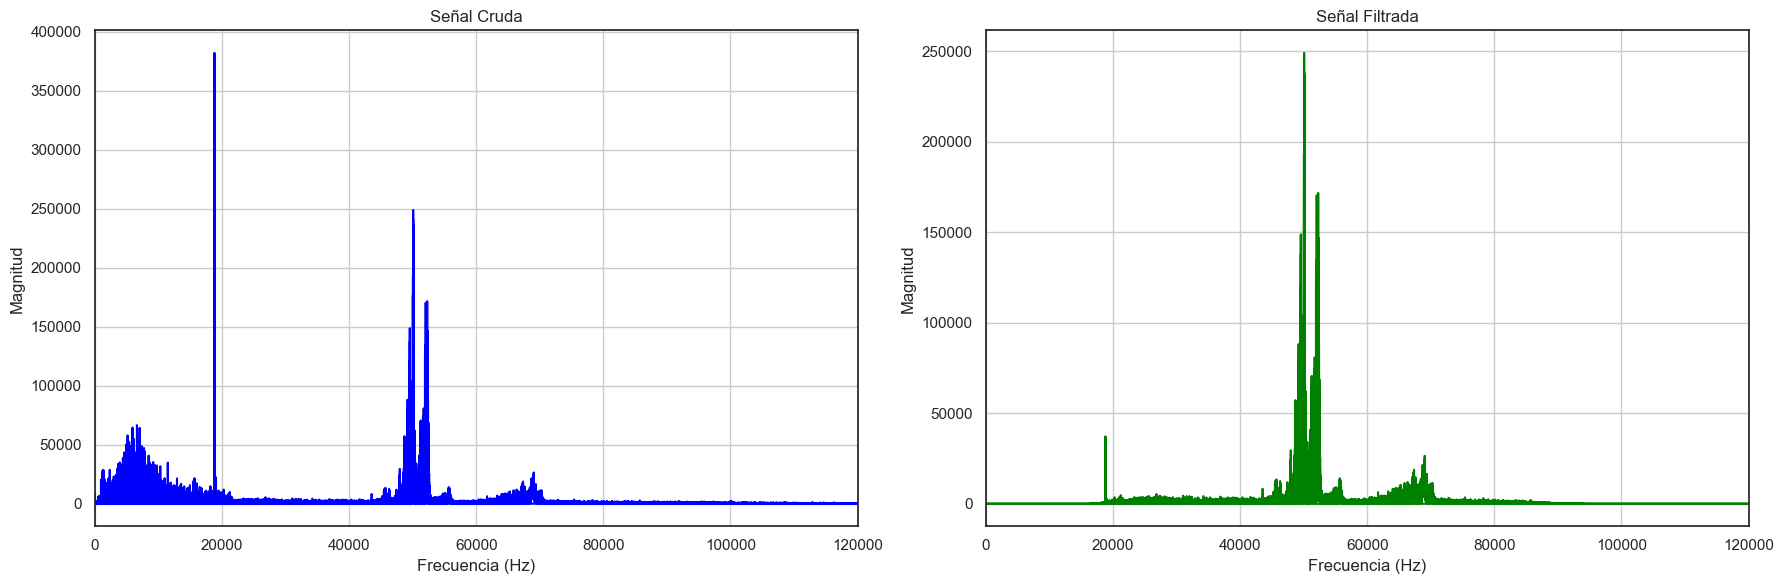

In [35]:
plt.figure(figsize=(18, 6))

# Señal cruda
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
plt.plot(freq[:N//2 + 1], energia[:N//2 + 1], color='blue')
plt.xlim(0, 120000)  # Hasta 120 kHz
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Señal Cruda')
plt.grid(True)

# Señal filtrada
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
plt.plot(freq_filtrado[:N//2 + 1], energia_filtrada[:N//2 + 1], color='green')
plt.xlim(0, 120000)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Señal Filtrada')
plt.grid(True)

# Mostrar todo junto
plt.tight_layout()
plt.show()